In [94]:
import pandas as pd

In [95]:
scores = pd.read_csv('Data/ratingsClear.csv', index_col=0)

In [96]:
weights_data = {
    'Housing' : 1.5,
    'Cost of Living' : 1.5,
    'Safety' : 1.5,
    'Healthcare' : 1.5,
    'Education' : 0.5,
    'Travel Connectivity' : 1.5,
}

weights_vector = pd.Series(0.0, index=scores.columns[3:])
for i in range(len(weights_vector)):
    row_name = weights_vector.index[i]
    weights_vector[i] = weights_data.get(row_name, 1)

In [97]:
summable_values = list(scores)
if 'Naive Sum' in summable_values:
    summable_values.remove('Naive Sum')
weighted_scores = scores.copy()
weighted_scores = weighted_scores * weights_vector
scores['Naive Sum'] = weighted_scores[summable_values].sum(numeric_only=True, axis=1)

In [98]:
# better, worse

midpoint = scores['Naive Sum'].quantile()
scores['Label'] = ''
scores.loc[scores['Naive Sum'] < midpoint, 'Label'] = 'worse'
scores.loc[scores['Naive Sum'] >= midpoint, 'Label'] = 'better'

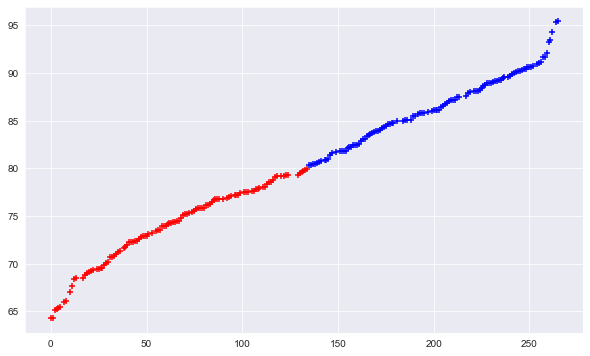

In [99]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
vals = scores['Naive Sum'].sort_values()
colors = np.where(vals >= midpoint, 'b', 'r')
ax.scatter(scores.index, vals, c=colors, marker='+')

In [100]:
scores

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Travel Connectivity,Commute,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Naive Sum,Label
id,,,,,,,,,,,,,,,,,
0,Aarhus,Denmark,Europe,6.1315,4.015,3.5360,6.31175,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,86.14750,better
1,Adelaide,Australia,Oceania,6.3095,4.692,1.7765,5.33625,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,78.52650,worse
2,Albuquerque,New Mexico,North America,7.2620,6.059,1.4555,5.05575,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,69.42275,worse
3,Almaty,Kazakhstan,Asia,9.2820,9.333,4.5920,5.87125,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,83.07600,better
4,Amsterdam,Netherlands,Europe,3.0530,3.824,8.3245,6.11850,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,87.62925,better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Wellington,New Zealand,Oceania,5.1345,5.161,0.8525,6.03975,8.2230,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,80.41150,better
261,Winnipeg,Canada,North America,7.5525,5.882,1.4755,5.10450,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,79.17850,worse
262,Wroclaw,Poland,Europe,8.4520,8.434,2.2445,4.95475,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,83.48575,better


In [101]:
scores.to_csv('Data/ratingsWithNaiveSum.csv')